# Fractal VR TMT analysis. (in R)


This notebook is running behavioral analysis of Fractal VR data. 


Only needed to be done once:

In [ ]:
packages <- c(
  "ez", "emmeans", "cowplot", "dplyr", "readr", "ggplot2", "lmerTest", 
  "hrbrthemes", "sjPlot", "sjmisc", "sjlabelled", "tidyr", "tidyverse", 
  "ggthemes", "ggpubr", "knitr", "jtools", "apaTables", "psych", "boot"
)

install.packages(packages)

In [1]:
# load libraries
library(ez)
citation("ez")
library(emmeans)
citation("emmeans")

# Plotting and formatting
library(cowplot)
library(dplyr)
library(readr) 
library(ggplot2)
#library(lmerTest)
library(hrbrthemes)
library(sjPlot)
library(sjmisc)
library(sjlabelled)
# Raincloud plot( from https://github.com/RainCloudPlots/RainCloudPlots):
# this file needs to be in the same directory as the script
source('R_rainclouds.R')
library(tidyr)
library(tidyverse)
library(ggthemes)
library(ggpubr)
# Formatting
library(knitr)
library(jtools)
library(apaTables)
# Reliability
library(psych)
library(tidyr)
library(boot)


Um Paket ‘ez’ in Publikationen zu zitieren, nutzen Sie bitte:

  Lawrence MA (2016). _ez: Easy Analysis and Visualization of Factorial
  Experiments_. R package version 4.4-0,
  <https://CRAN.R-project.org/package=ez>.

Ein BibTeX-Eintrag für LaTeX-Benutzer ist

  @Manual{,
    title = {ez: Easy Analysis and Visualization of Factorial Experiments},
    author = {Michael A. Lawrence},
    year = {2016},
    note = {R package version 4.4-0},
    url = {https://CRAN.R-project.org/package=ez},
  }

ACHTUNG: Diese Zitationsinformation wurde aus der DESCRIPTION-Datei
automatisch generiert. Evtl. ist manuelle Nachbearbeitung nötig, siehe
‘help("citation")’.

Welcome to emmeans.
Caution: You lose important information if you filter this package's results.
See '? untidy'



Um Paket ‘emmeans’ in Publikationen zu zitieren, nutzen Sie bitte:

  Lenth R (2024). _emmeans: Estimated Marginal Means, aka Least-Squares
  Means_. R package version 1.10.6,
  <https://CRAN.R-project.org/package=emmeans>.

Ein BibTeX-Eintrag für LaTeX-Benutzer ist

  @Manual{,
    title = {emmeans: Estimated Marginal Means, aka Least-Squares Means},
    author = {Russell V. Lenth},
    year = {2024},
    note = {R package version 1.10.6},
    url = {https://CRAN.R-project.org/package=emmeans},
  }


Attache Paket: ‘dplyr’


Die folgenden Objekte sind maskiert von ‘package:stats’:

    filter, lag


Die folgenden Objekte sind maskiert von ‘package:base’:

    intersect, setdiff, setequal, union



Attache Paket: ‘sjPlot’


Die folgenden Objekte sind maskiert von ‘package:cowplot’:

    plot_grid, save_plot


Install package "strengejacke" from GitHub (`devtools::install_github("strengejacke/strengejacke")`) to load all sj-packages at once!


Attache Paket: ‘sjlabelled’


Das folgende Objekt ist maskiert ‘package:ggplot2’:

    as_label


Das folgende Objekt ist maskiert ‘package:dplyr’:

    as_label


Warning message in install.packages(setdiff(packages, rownames(installed.packages()))):
“Installation des Pakets ‘smooth’ hatte Exit-Status ungleich 0”
Aktualisiere HTML-Index der Pakete in '.Library'

Making 'packages.html' ...
 fertig


Attache Paket: ‘tidyr’


Das folgende Objekt ist maskiert ‘package:sjmisc’:

    replace_na


── Attaching core tidyverse packages ───────────────

### Functions

Helper functions that help organise and analyse the data

In [2]:
load_tmt <- function(subjects, root) {
  # Predefined column names
  data_columns <- c("subject", "date", "block", "trial", "order", "condition", 
                    "trigger_time", "start_time", "end_time", "duration", 
                    "accuracy", "attempts", "errors", "avg_line_length", 
                    "shortest_path", "relative_length", "response_order")
  
  # Create empty data frames with predefined column names
  data_collective <- data.frame(matrix(ncol = length(data_columns), nrow = 0))
  colnames(data_collective) <- data_columns
  
  # path_collective <- data.frame()
  
  # Loop through the subjects
  for (i in 1:length(subjects)) {
    # Construct the paths to the data files
    data_path <- paste0(root, subjects[i], "_TMT_behavior.csv")
    #path_path <- paste0(root, subjects[i], "_TMT_paths.csv")
    #print(subjects[i])
    # Load the data without row names
    # Load the data without row names
    data_tmt <- read.csv(data_path,row.names = NULL, sep = ",",dec = ".",stringsAsFactors = FALSE, header = TRUE)
    #print(data_tmt)
    #path_tmt <- read.csv(path_path, row.names = NULL,sep = ",")
    
    # Remove the row.names and X columns if they exist
    data_tmt <- data_tmt[, !names(data_tmt) %in% c("X")]
    
    # Add the subject id
    #data_tmt$subject <- subjects[i]
    #path_tmt$subject <- subjects[i]

    # Ensure all columns are present
    missing_cols <- setdiff(data_columns, names(data_tmt))
    if (length(missing_cols) > 0) {
      for (col in missing_cols) {
        data_tmt[[col]] <- NA
      }
    }
    data_tmt <- data_tmt[, data_columns]
    
    # Ensure column names match for data_tmt
    if (!all(names(data_collective) == names(data_tmt))) {
      print("Column names of data_collective:")
      print(names(data_collective))
      print("Column names of data_tmt:")
      print(names(data_tmt))
      stop("Column names of data_tmt do not match data_collective")
    }
    data_collective <- rbind(data_collective, data_tmt)
    
    # if (nrow(path_collective) == 0) {
    #   path_collective <- path_tmt
    # } else {
    #   # Standardize column names
    #   common_cols <- intersect(names(path_collective), names(path_tmt))
    #   path_collective <- path_collective[, common_cols, drop = FALSE]
    #   path_tmt <- path_tmt[, common_cols, drop = FALSE]
      
    #   if (!all(names(path_collective) == names(path_tmt))) {
    #     print("Column names of path_collective:")
    #     print(names(path_collective))
    #     print("Column names of path_tmt:")
    #     print(names(path_tmt))
    #     stop("Column names of path_tmt do not match path_collective")
    #   }
    #   path_collective <- rbind(path_collective, path_tmt)
    # }
  }
  
  return(list(data = data_collective)) #path = path_collective
}

In [3]:
# Root for the data
# root <- '/users/sztuka/Documents/FractalVR/data/'
root <- '/Volumes/IMS_Drive3/FractalVR/data/tmt/'

subjects <- list.files(root, pattern = "_TMT_behavior.csv") 
# list only sub-XXX names with no extensions
subjects <- gsub("_TMT_behavior.csv", "", subjects)
print(subjects)
# unique only

result <- load_tmt(subjects, root)

# Access the loaded data
data_collective <- result$data
path_collective <- result$path

#Exclude all rows sub_Z2CN1H sub_YG0DT2, subject, JGMJ5O
data_collective <- data_collective[!(data_collective$subject %in% c("Z2CN1H", "YG0DT2", "JGMJ5P","MX16R1","subject")),]
n_subjects <- length(unique(data_collective$subject))
cat("Number of subjects: ", n_subjects, "\n")

 [1] "sub_0FJ87G" "sub_1L9FCD" "sub_1LCED7" "sub_4VP5UW" "sub_5Z6HUD"
 [6] "sub_6AAVN4" "sub_86L56R" "sub_AAU5L2" "sub_CNYTQ6" "sub_E3R3C1"
[11] "sub_F3N17K" "sub_FA5FCX" "sub_FX4L2F" "sub_GE00WM" "sub_GH9FPG"
[16] "sub_J3R7L4" "sub_JGMJ5P" "sub_JREJ7A" "sub_KQT35L" "sub_KWCTKJ"
[21] "sub_MARMAA" "sub_MNQJJL" "sub_MPN87Y" "sub_MX16R1" "sub_N6FGR8"
[26] "sub_PVAA50" "sub_RJ70HQ" "sub_RQGUR7" "sub_V3MK4V" "sub_V4JN59"
[31] "sub_VJRPUP" "sub_VM3K4U" "sub_VU30R8" "sub_VVXYJ5" "sub_X37HQQ"
[36] "sub_XRDKL8" "sub_Y98J0U" "sub_YG0DT2" "sub_Z2CN1H" "sub_Z6WJKG"
Number of subjects:  36 


In [9]:
# nuber of rows
nrow(data_collective)


[1] 962

In [4]:
# filter by accuracy less than 0.2 - removing outliers
data_collective2 <- data_collective #[data_collective$accuracy > 0.2,]

In [5]:
#  Create new columns for TMT_type, S/E or L/M/H if condition includes A then TMT_type is A if B then TMT_type is B, if contains S then S/E is S if E then S/E is E, if contains L then L/M/H is L if M then L/M/H is M if H then L/M/H is H

data_collective2$TMT_type <- ifelse(grepl("A", data_collective2$condition), "A", 
                                    ifelse(grepl("B", data_collective2$condition), "B", "baseline"))

data_collective2$S_E <- ifelse(grepl("S", data_collective2$condition), "Statistical",
                                ifelse(grepl("E", data_collective2$condition), "Extact", "baseline"))    
                            
data_collective2$L_M_H <- ifelse(grepl("L", data_collective2$condition), "Low",
                                ifelse(grepl("M", data_collective2$condition), "Medium",
                                ifelse(grepl("H", data_collective2$condition), "High", "baseline")))

# convert duration from ch to numeric

data_collective2$duration <- as.numeric(data_collective2$duration)
# accuracy from character to numeric
data_collective2$accuracy <- as.numeric(data_collective2$accuracy)
# conver avg_line_length from character to numeric
data_collective2$avg_line_length <- as.numeric(data_collective2$avg_line_length)


In [6]:
# count instances of subject and print it

for (i in unique(data_collective2$subject)) {
  cat(i, ":", sum(data_collective2$subject == i), "\n")
}

0FJ87G : 26 
1L9FCD : 26 
1LCED7 : 26 
4VP5UW : 26 
5Z6HUD : 26 
6AAVN4 : 26 
86L56R : 26 
AAU5L2 : 26 
CNYTQ6 : 26 
E3R3C1 : 26 
F3N17K : 26 
FA5FCX : 26 
FX4L2F : 26 
GE00WM : 26 
GH9FPG : 26 
J3R7L4 : 26 
JREJ7A : 26 
KQT35L : 26 
KWCTKJ : 26 
MARMAA : 26 
MNQJJL : 26 
MPN87Y : 26 
N6FGR8 : 26 
PVAA50 : 26 
RJ70HQ : 26 
RQGUR7 : 26 
V3MK4V : 26 
V4JN59 : 26 
VJRPUP : 26 
VM3K4U : 26 
VU30R8 : 26 
VVXYT5 : 26 
X37HQQ : 26 
XRDKL8 : 26 
Y98J0U : 26 
Z6WJKG : 26 


    subject             date block trial order    condition    trigger_time
185  AAU5L2 2025_Jan_28_0821     2     1     A ['A', 'E-H']  1/28/2025 9:10
622  N6FGR8 2025_Jan_22_1054     2     2     B ['B', 'S-H'] 1/22/2025 11:28
    start_time end_time duration accuracy attempts errors avg_line_length
185   2954.209 2960.636 6.426449     0.04        0     22       34136.463
622   2063.519 2067.551 4.031942     0.12        0     22        9396.884
    shortest_path relative_length response_order TMT_type         S_E L_M_H
185      5051.904        675.7148      [0, 2, 1]        A      Extact  High
622      5051.904        186.0068      [0, 1, 2]        B Statistical  High


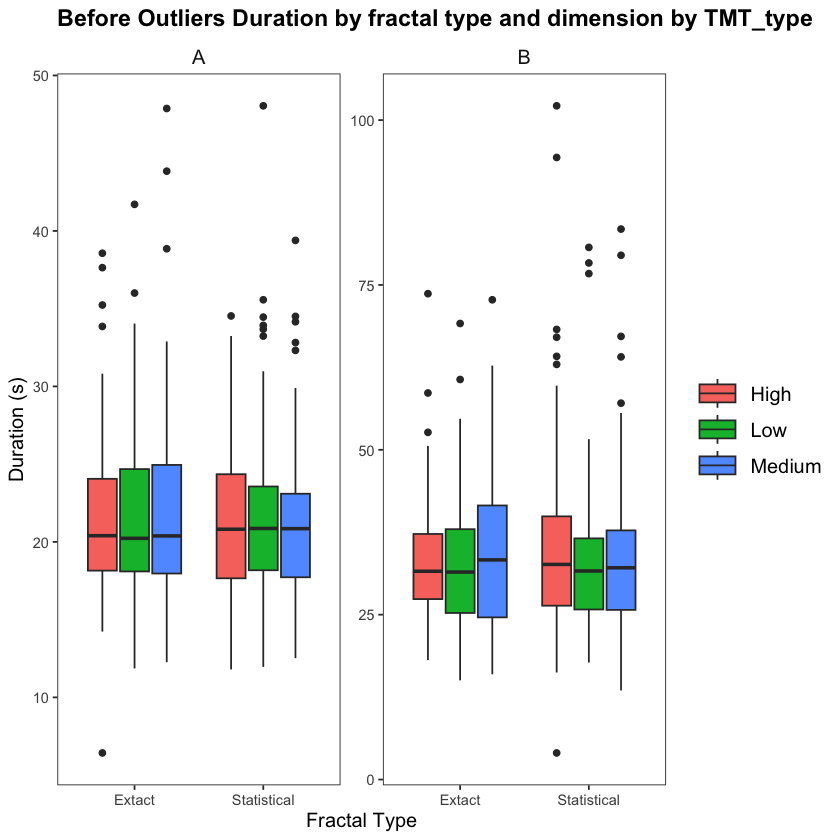

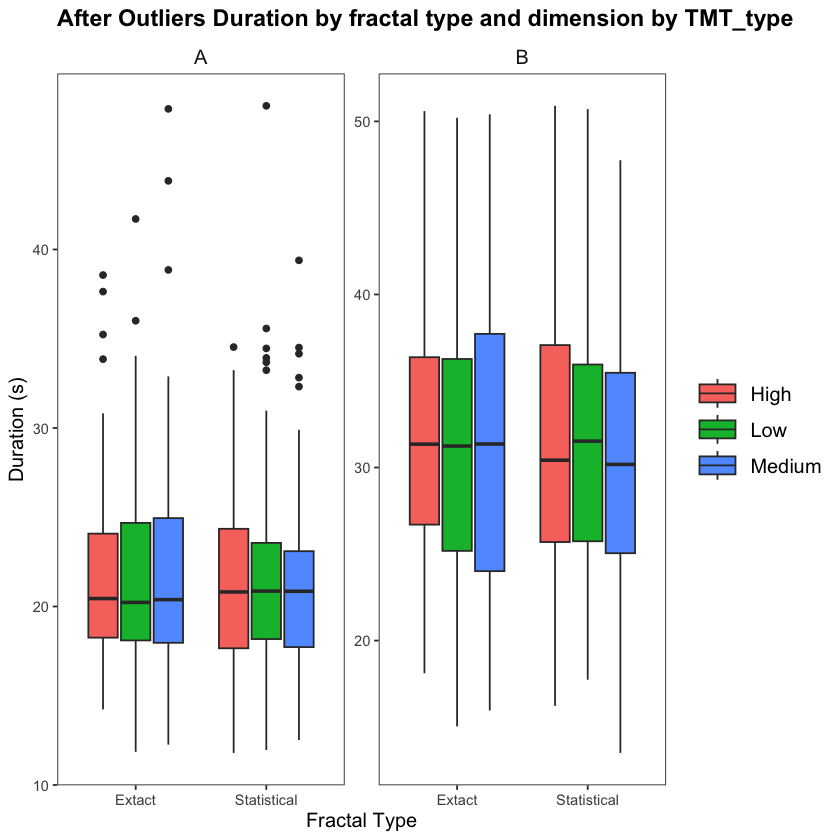

In [21]:
# plot the duration data by S_E and L_M_H facet by TMT_type

# remove baseline
data_collective_nobaseline <- data_collective2[data_collective2$TMT_type != "baseline",]

# remove outlivers more than 2.5 SD
# data_collective_nobaseline <- data_collective_nobaseline[!(data_collective_nobaseline$duration > mean(data_collective_nobaseline$duration) + 2.5 * sd(data_collective_nobaseline$duration)),]

# plot the duration data by S_E and L_M_H facet by TMT_type via raincloud plot

p_before <- ggplot(data = data_collective_nobaseline, aes(x = S_E, y = duration, fill = L_M_H)) +
  geom_boxplot() +
  scale_color_brewer(palette = "Set1") +
  theme(legend.position = "top") +
  facet_wrap(~TMT_type, scales = "free_y") +
  theme_apa() +
  labs(x = "Fractal Type", y = "Duration (s)", title = "Before Outliers Duration by fractal type and dimension by TMT_type")

p_before

# print rows with duration less than 10s 
print(data_collective_nobaseline[data_collective_nobaseline$duration < 10,])
# remove all rows with duration less than 10s
data_collective_nobaseline <- data_collective_nobaseline[data_collective_nobaseline$duration > 10,]

# remove outlivers more than 2.5 SD
data_collective_nobaseline <- data_collective_nobaseline[!(data_collective_nobaseline$duration > mean(data_collective_nobaseline$duration) + 2 * sd(data_collective_nobaseline$duration)),]

p_after <- ggplot(data = data_collective_nobaseline, aes(x = S_E, y = duration, fill = L_M_H)) +
  geom_boxplot() +
  scale_color_brewer(palette = "Set1") +
  theme(legend.position = "top") +
  facet_wrap(~TMT_type, scales = "free_y") +
  theme_apa() +
  labs(x = "Fractal Type", y = "Duration (s)", title = "After Outliers Duration by fractal type and dimension by TMT_type")

p_after
# # anova for duration

# duration_anova <- ezANOVA(data = data_collective_nobaseline, dv = duration, wid = subject, within = .(S_E, L_M_H, TMT_type))
# # knit table
# knitr::kable(duration_anova)
# # apa style for publication
# # apa.ezANOVA.table(duration_anova)

# # Pairwise comparisons for duration by TMT_type
# # Include TMT_type in the model
# model <- lmer(duration ~ S_E * L_M_H * TMT_type + (1 | subject), data = data_collective_nobaseline)
# emmeans_model <- emmeans(model, ~ S_E * L_M_H | TMT_type)
# pairwise_results <- pairs(emmeans_model)

# # Print pairwise comparison results
# knitr::kable(pairwise_results)


# # t-test for duration by S_E on duration by TMT_type

# # TMT_type A

# ttest_A <- t.test(duration ~ S_E, data = data_collective_nobaseline[data_collective_nobaseline$TMT_type == "A",])
# # TMT_type B
# ttest_B <- t.test(duration ~ S_E, data = data_collective_nobaseline[data_collective_nobaseline$TMT_type == "B",])

# # Print t-test results
# ttest_A
# ttest_B

library(lmerTest)
library(lme4)

# relevel LMH to Low
data_collective_nobaseline$L_M_H <- factor(data_collective_nobaseline$L_M_H, levels = c("Low", "Medium", "High"))
data_collective_nobaseline$L_M_H <- relevel(data_collective_nobaseline$L_M_H, ref = "Low")


# LMER duration ~ S_E * L_M_H * TMT_type + (1 | subject)
model <- lmer(duration ~ S_E * L_M_H * TMT_type + accuracy + (1 | subject) , data = data_collective_nobaseline)


model1 <- lmer(duration ~ S_E * L_M_H + (1 | subject), data = data_collective_nobaseline)

tab_model(model)
#tab_model(model1)

In [16]:
# summary statistics for S_E and L_M_H and TMT_type

data_c <- data_collective_nobaseline %>%
  group_by(S_E, L_M_H, TMT_type) %>%
  summarise(mean_duration = mean(duration, na.rm = TRUE),
            sd_duration = sd(duration, na.rm = TRUE),
            # min
            min_duration = min(duration, na.rm = TRUE),
            # max
            max_duration = max(duration, na.rm = TRUE),
            n = n()) %>%
  ungroup()

# Print the summary statistics
print(data_c)



`summarise()` has grouped output by 'S_E', 'L_M_H'. You can override using the
`.groups` argument.


# A tibble: 12 × 8
   S_E        L_M_H TMT_type mean_duration sd_duration min_duration max_duration
   <chr>      <chr> <chr>            <dbl>       <dbl>        <dbl>        <dbl>
 1 Extact     High  A                 21.9        5.34         14.2         38.6
 2 Extact     High  B                 31.9        7.52         18.1         50.6
 3 Extact     Low   A                 21.6        5.58         11.9         41.7
 4 Extact     Low   B                 31.2        7.80         15.0         50.2
 5 Extact     Medi… A                 21.9        6.53         12.3         47.9
 6 Extact     Medi… B                 31.8        8.77         16.0         50.4
 7 Statistic… High  A                 21.2        5.04         11.8         34.5
 8 Statistic… High  B                 31.1        8.36         16.2         50.9
 9 Statistic… Low   A                 21.7        5.94         12.0         48.0
10 Statistic… Low   B                 31.5        7.97         17.7         50.7
11 Statis

Warning message:
“Converting "subject" to factor for ANOVA.”
Warning message:
“Converting "S_E" to factor for ANOVA.”
Warning message:
“Converting "L_M_H" to factor for ANOVA.”
Warning message:
“Converting "TMT_type" to factor for ANOVA.”
Warning message:
“Collapsing data to cell means. *IF* the requested effects are a subset of the full design, you must use the "within_full" argument, else results may be inaccurate.”




|   |Effect             | DFn| DFd|         F|         p|p<.05 |       ges|
|:--|:------------------|---:|---:|---------:|---------:|:-----|---------:|
|2  |S_E                |   1|  14| 0.0050030| 0.9446114|      | 0.0000377|
|3  |L_M_H              |   2|  28| 0.3877175| 0.6821908|      | 0.0040542|
|4  |TMT_type           |   1|  14| 0.3313269| 0.5740151|      | 0.0018427|
|5  |S_E:L_M_H          |   2|  28| 0.4599183| 0.6360200|      | 0.0031293|
|6  |S_E:TMT_type       |   1|  14| 0.2005092| 0.6611610|      | 0.0006301|
|7  |L_M_H:TMT_type     |   2|  28| 0.3959615| 0.6767418|      | 0.0028805|
|8  |S_E:L_M_H:TMT_type |   2|  28| 1.7666214| 0.1894312|      | 0.0098060|

|   |Effect             |         W|         p|p<.05 |
|:--|:------------------|---------:|---------:|:-----|
|3  |L_M_H              | 0.7973441| 0.2294550|      |
|5  |S_E:L_M_H          | 0.6200738| 0.0447592|*     |
|7  |L_M_H:TMT_type     | 0.9059089| 0.5260770|      |
|8  |S_E:L_M_H:TMT_type | 0.8959745| 0



|contrast                              |TMT_type |   estimate|        SE|       df|    t.ratio|   p.value|
|:-------------------------------------|:--------|----------:|---------:|--------:|----------:|---------:|
|Extact High - Statistical High        |A        | -0.0506667| 0.0588034| 326.0005| -0.8616279| 0.9552395|
|Extact High - Extact Low              |A        | -0.0826667| 0.0588034| 326.0005| -1.4058140| 0.7235336|
|Extact High - Statistical Low         |A        | -0.0653333| 0.0588034| 326.0005| -1.1110466| 0.8766408|
|Extact High - Extact Medium           |A        | -0.0413333| 0.0588034| 326.0005| -0.7029070| 0.9815140|
|Extact High - Statistical Medium      |A        | -0.0453333| 0.0588034| 326.0005| -0.7709303| 0.9722121|
|Statistical High - Extact Low         |A        | -0.0320000| 0.0588034| 326.0005| -0.5441861| 0.9942699|
|Statistical High - Statistical Low    |A        | -0.0146667| 0.0588034| 326.0005| -0.2494186| 0.9998680|
|Statistical High - Extact Medium  

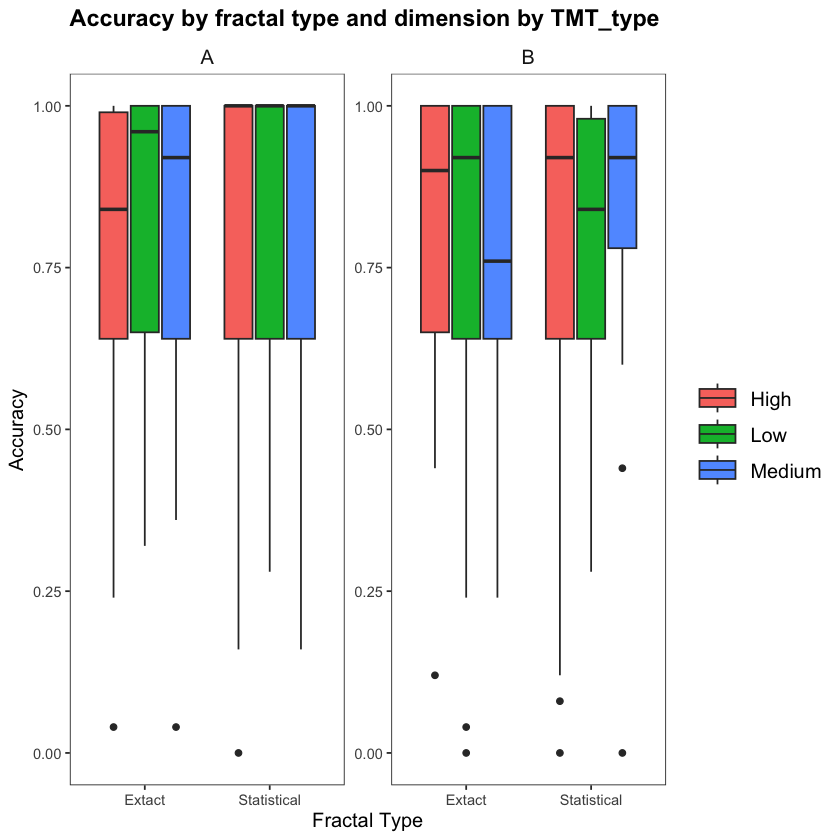

In [153]:
# accuracy 

# plot the accuracy data by S_E and L_M_H facet by TMT_type data_collective_nobaseline

r <- ggplot(data = data_collective_nobaseline, aes(x = S_E, y = accuracy, fill = L_M_H)) +
  geom_boxplot() +
  scale_color_brewer(palette = "Set1") +
  theme(legend.position = "top") +
  facet_wrap(~TMT_type, scales = "free_y") +
  theme_apa() +
  labs(x = "Fractal Type", y = "Accuracy", title = "Accuracy by fractal type and dimension by TMT_type")

r

# anova for accuracy
accuracy_anova <- ezANOVA(data = data_collective_nobaseline, dv = accuracy, wid = subject, within = .(S_E, L_M_H, TMT_type))
# knit table
knitr::kable(accuracy_anova)

# Pairwise comparisons for accuracy by TMT_type
# Include TMT_type in the model
model <- lmer(accuracy ~ S_E * L_M_H * TMT_type + (1 | subject), data = data_collective_nobaseline)
emmeans_model <- emmeans(model, ~ S_E * L_M_H | TMT_type)
pairwise_results <- pairs(emmeans_model)

# Print pairwise comparison results
knitr::kable(pairwise_results)

tab_model(model)

In [156]:
data_collective_nobaseline$errors <- as.numeric(data_collective_nobaseline$errors)

Warning message:
“Converting "subject" to factor for ANOVA.”
Warning message:
“Converting "S_E" to factor for ANOVA.”
Warning message:
“Converting "L_M_H" to factor for ANOVA.”
Warning message:
“Converting "TMT_type" to factor for ANOVA.”
Warning message:
“Collapsing data to cell means. *IF* the requested effects are a subset of the full design, you must use the "within_full" argument, else results may be inaccurate.”




|   |Effect             | DFn| DFd|         F|         p|p<.05 |       ges|
|:--|:------------------|---:|---:|---------:|---------:|:-----|---------:|
|2  |S_E                |   1|  14| 0.2657672| 0.6142296|      | 0.0015742|
|3  |L_M_H              |   2|  28| 0.4132081| 0.6654927|      | 0.0036439|
|4  |TMT_type           |   1|  14| 3.5984808| 0.0786549|      | 0.0336145|
|5  |S_E:L_M_H          |   2|  28| 0.0857978| 0.9180201|      | 0.0009460|
|6  |S_E:TMT_type       |   1|  14| 2.6247559| 0.1275073|      | 0.0134394|
|7  |L_M_H:TMT_type     |   2|  28| 0.2216310| 0.8026031|      | 0.0017373|
|8  |S_E:L_M_H:TMT_type |   2|  28| 0.6028832| 0.5541814|      | 0.0073497|

|   |Effect             |         W|         p|p<.05 |
|:--|:------------------|---------:|---------:|:-----|
|3  |L_M_H              | 0.8575762| 0.3683601|      |
|5  |S_E:L_M_H          | 0.8850650| 0.4522082|      |
|7  |L_M_H:TMT_type     | 0.6526569| 0.0624384|      |
|8  |S_E:L_M_H:TMT_type | 0.8596370| 0



|contrast                              |TMT_type |   estimate|        SE|       df|    t.ratio|   p.value|
|:-------------------------------------|:--------|----------:|---------:|--------:|----------:|---------:|
|Extact High - Statistical High        |A        |  1.3666667| 0.6449023| 326.0048|  2.1191840| 0.2799411|
|Extact High - Extact Low              |A        |  0.7000000| 0.6449023| 326.0048|  1.0854357| 0.8869959|
|Extact High - Statistical Low         |A        |  0.9666667| 0.6449023| 326.0048|  1.4989351| 0.6652171|
|Extact High - Extact Medium           |A        |  0.4333333| 0.6449023| 326.0048|  0.6719364| 0.9848971|
|Extact High - Statistical Medium      |A        |  0.9666667| 0.6449023| 326.0048|  1.4989351| 0.6652171|
|Statistical High - Extact Low         |A        | -0.6666667| 0.6449023| 326.0048| -1.0337483| 0.9062932|
|Statistical High - Statistical Low    |A        | -0.4000000| 0.6449023| 326.0048| -0.6202490| 0.9895020|
|Statistical High - Extact Medium  

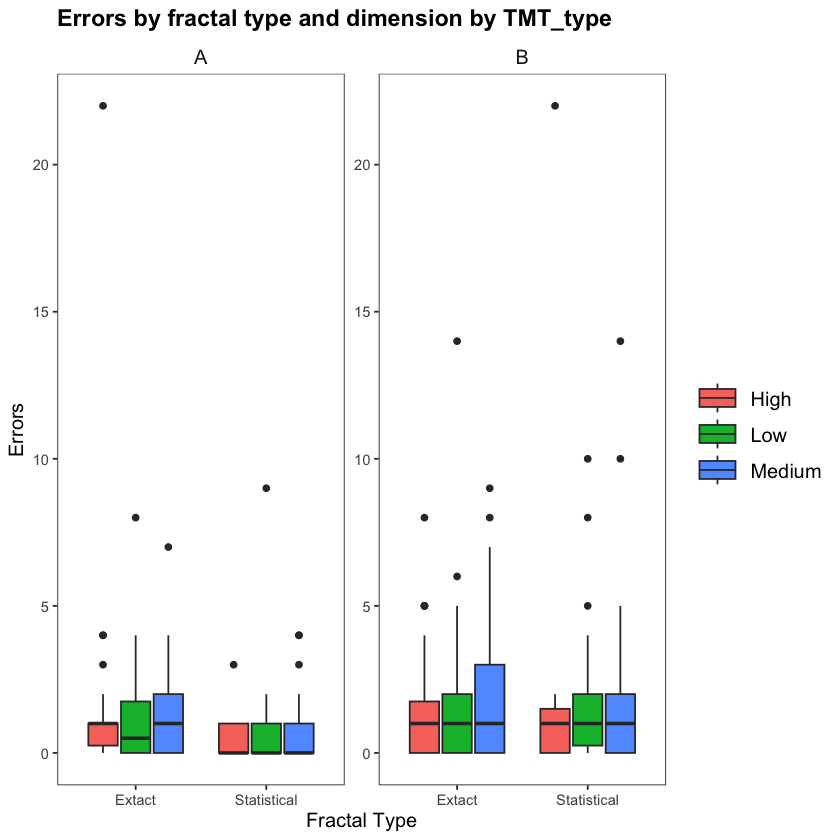

In [158]:
# do the same for errors

# plot the errors data by S_E and L_M_H facet by TMT_type data_collective_nobaseline

s <- ggplot(data = data_collective_nobaseline, aes(x = S_E, y = errors, fill = L_M_H)) +
  geom_boxplot() +
  scale_color_brewer(palette = "Set1") +
  theme(legend.position = "top") +
  facet_wrap(~TMT_type, scales = "free_y") +
  theme_apa() +
  labs(x = "Fractal Type", y = "Errors", title = "Errors by fractal type and dimension by TMT_type")
s

# anova for errors
errors_anova <- ezANOVA(data = data_collective_nobaseline, dv = errors, wid = subject, within = .(S_E, L_M_H, TMT_type))
# knit table
knitr::kable(errors_anova)

# Pairwise comparisons for errors by TMT_type
# Include TMT_type in the model

model <- lmer(errors ~ S_E * L_M_H * TMT_type + (1 | subject), data = data_collective_nobaseline)
emmeans_model <- emmeans(model, ~ S_E * L_M_H | TMT_type)
pairwise_results <- pairs(emmeans_model)

# Print pairwise comparison results
knitr::kable(pairwise_results)

tab_model(model)